# Medial Axis node grid
Research Notebook to create a grid using Medial Axis approach.

## Imports

In [1]:
import numpy as np
from skimage.morphology import medial_axis
from skimage.util import invert
from planning_utils import create_grid_no_height
import time

%matplotlib inline

## Load Data

In [2]:
# This is the same obstacle data from the previous lesson.
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ...
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


## Visualize map grid

In [3]:
print('start')
drone_altitude = 5
safety_distance = 3
grid = create_grid_no_height(data, drone_altitude, safety_distance)
print('done')

start
done


start


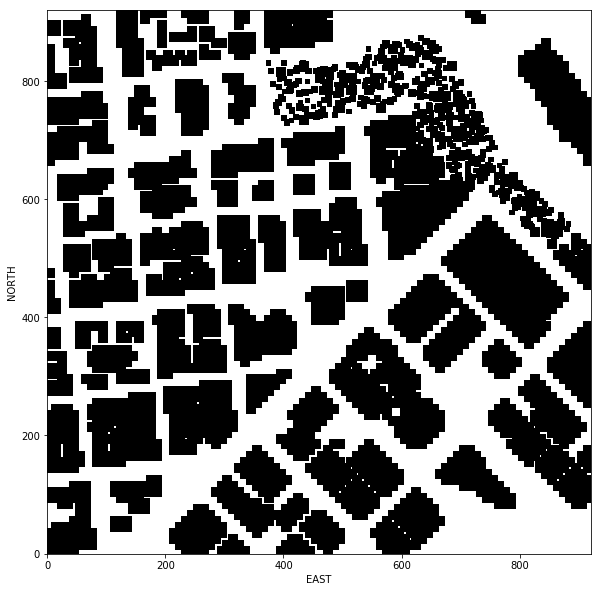

done


In [4]:
import matplotlib.pyplot as plt
print('start')
# Plot it up!
fig = plt.figure(figsize=(10,10))
plt.imshow(grid, origin='lower', cmap='Greys')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()
print('done')

## Medial Axis graph method

In [5]:
print('Creating Medial Axis')
t0 = time.time()
skeleton = medial_axis(invert(grid))
print('Medial Axis with {0} nodes, shape {1}'.format(skeleton.size, skeleton.shape))
print('Medial Axis took {0} seconds to build'.format(time.time()-t0))

Creating Medial Axis
Medial Axis with 848241 nodes, shape (921, 921)
Medial Axis took 0.28179168701171875 seconds to build


## Save to pickle

In [6]:
import pickle

# Dump the graph with Pickle
pkl_filename = 'graph.medialaxis.p'

try:
    with open(pkl_filename, 'wb+') as pfile:
        print('Saving to pickle file ', pkl_filename)
        pickle.dump(
        {
            'skeleton': skeleton,
        },
        pfile, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save data to ', pkl_filename, ':', e)

print('done')

Saving to pickle file  graph.medialaxis.p
done


## Load from pickle

In [7]:
import pickle

pkl_filename = 'graph.medialaxis.p'
with open(pkl_filename, "rb") as pfile:
    print('Reading pickle')
    dist_pickle = pickle.load(pfile)

    skeleton = dist_pickle['skeleton']

print('done')

Reading pickle
done


## Visualize graph

start


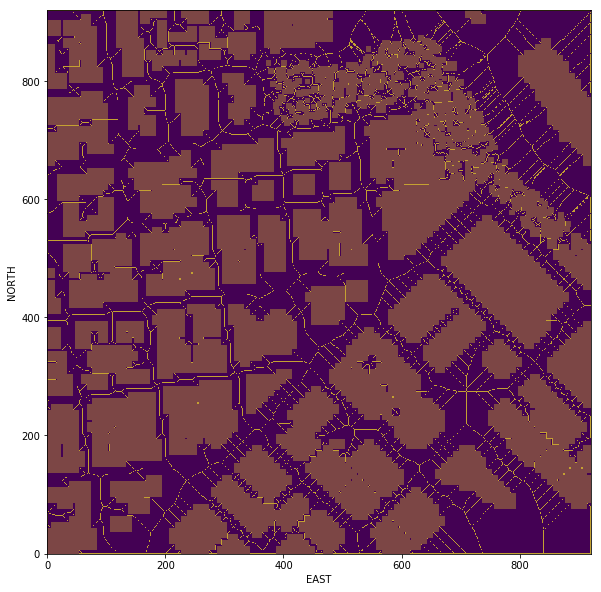

done


In [8]:
import matplotlib.pyplot as plt
print('start')
fig = plt.figure(figsize=(10,10))
plt.imshow(grid, origin='lower')
plt.imshow(skeleton, origin='lower', alpha=0.7)

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()
print('done')

## A*

In [9]:
def find_random_node(skel, node):
    skel_cells = np.transpose(skel.nonzero())
    node_min_dist = np.linalg.norm(np.array(node) - np.array(skel_cells), axis=1).argmin()
    near_node = skel_cells[node_min_dist]

    return near_node

In [14]:
start_ne = np.random.choice(len(skeleton),2)
goal_ne = np.random.choice(len(skeleton),2)

skel_start = find_random_node(skeleton, start_ne)
skel_goal = find_random_node(skeleton, goal_ne)

print('Start location: {0}, Start Node: {1}'.format(start_ne, skel_start))
print('Goal location: {0}, Goal Node: {1}'.format(goal_ne, skel_goal))

Start location: [511  54], Start Node: [530  54]
Goal location: [ 32 468], Goal Node: [ 16 456]


In [15]:
from planning_utils import a_star, heuristic

# Run A* on the skeleton
path, cost = a_star(invert(skeleton).astype(np.int), heuristic, tuple(skel_start), tuple(skel_goal))
print("Path length = {0}, path cost = {1}".format(len(path), cost))

Path length = 803, path cost = 922.1219330882004


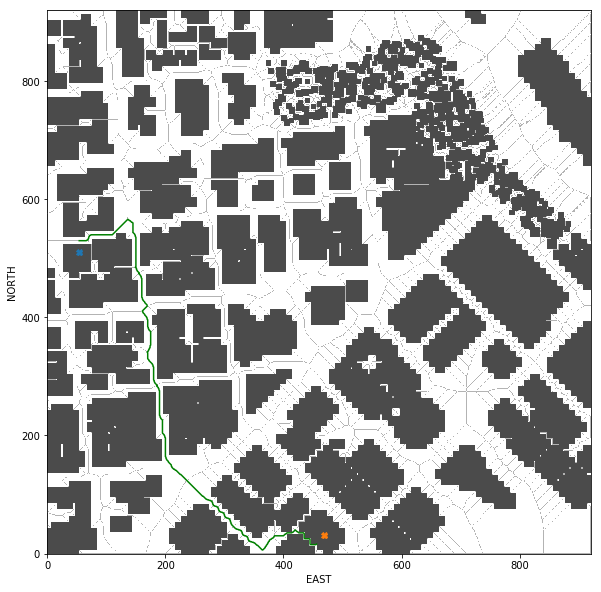

In [16]:
fig = plt.figure(figsize=(10,10))
plt.imshow(grid, cmap='Greys', origin='lower')
plt.imshow(skeleton, cmap='Greys', origin='lower', alpha=0.3)
# For the purposes of the visual the east coordinate lay along
# the x-axis and the north coordinates long the y-axis.
plt.plot(start_ne[1], start_ne[0], 'X')
plt.plot(goal_ne[1], goal_ne[0], 'X')

nmin = np.min(data[:, 0])
emin = np.min(data[:, 1])

pp = np.array(path)
plt.plot(pp[:, 1], pp[:, 0], 'g')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()